In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import tree
data=pd.read_csv('students.csv')
data.head()

,Student ID,Age,Gender,CTC (LPA),Average GPA,GPA Class
0,1000001,21.0,Male,0.00,6.99,1
1,1000002,19.0,Male,6.05,7.36,1
2,1000002,19.0,Male,6.05,7.36,1
3,1000003,19.0,Male,0.00,6.46,1
4,1000004,19.0,Female,0.00,7.08,1


In [2]:
data.drop(columns = ['Student ID'], inplace=True)
data.head()

,Age,Gender,CTC (LPA),Average GPA,GPA Class
0,21.0,Male,0.00,6.99,1
1,19.0,Male,6.05,7.36,1
2,19.0,Male,6.05,7.36,1
3,19.0,Male,0.00,6.46,1
4,19.0,Female,0.00,7.08,1


In [3]:
data.describe()

,Age,CTC (LPA),Average GPA,GPA Class
count,1995.000000,2000.000000,2000.000000,2001.000000
mean,20.468170,5.796025,7.005030,1.004998
std,1.726647,6.562056,0.362713,0.104762
min,18.000000,0.000000,4.880000,0.000000
25%,19.000000,0.000000,6.770000,1.000000
50%,21.000000,3.460000,7.010000,1.000000
75%,22.000000,11.260000,7.220000,1.000000
max,23.000000,19.990000,9.860000,3.000000


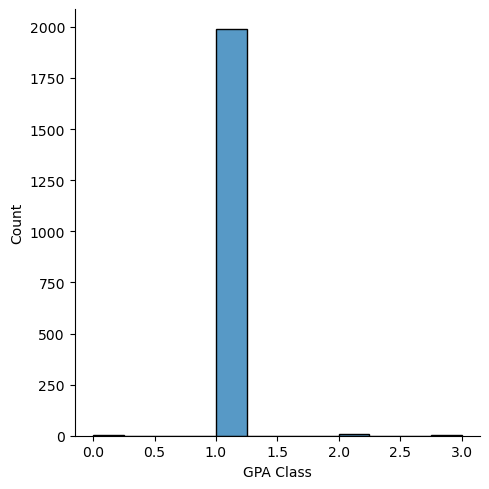

In [18]:
sns.displot(data['GPA Class'])

In [5]:
le = LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'])
data.corr()

,Age,Gender,CTC (LPA),Average GPA,GPA Class
Age,1.000000,0.001224,-0.014056,-0.033278,-0.004656
Gender,0.001224,1.000000,0.000450,-0.010493,-0.028406
CTC (LPA),-0.014056,0.000450,1.000000,0.024591,-0.046997
Average GPA,-0.033278,-0.010493,0.024591,1.000000,0.366287
GPA Class,-0.004656,-0.028406,-0.046997,0.366287,1.000000


<Axes: >

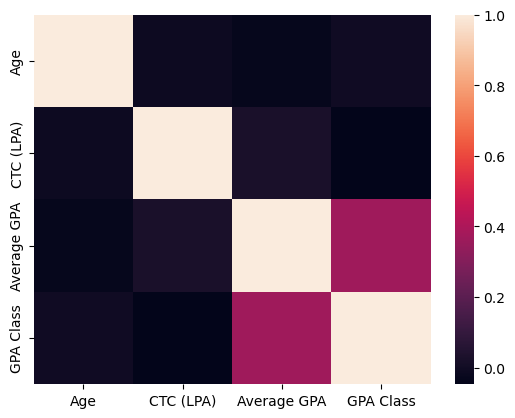

In [6]:
data.drop(columns=['Gender'], inplace=True)
sns.heatmap(data.corr())

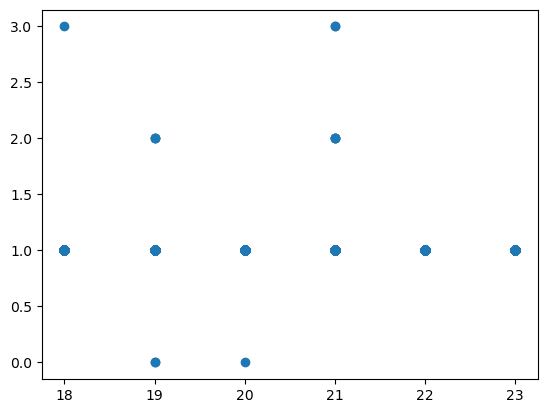

In [19]:
plt.scatter(data['Age'], data['GPA Class'])

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
y_pred=classifier.predict(X_test)

(4, 4)


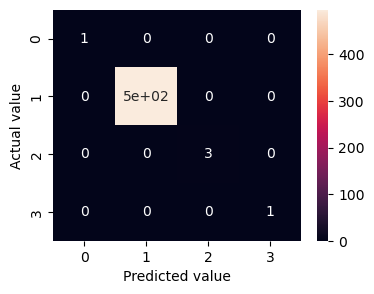

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
conf=confusion_matrix(y_test, y_pred)
print(conf.shape)
plt.figure(figsize=(4,3))
sn.heatmap(conf, annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

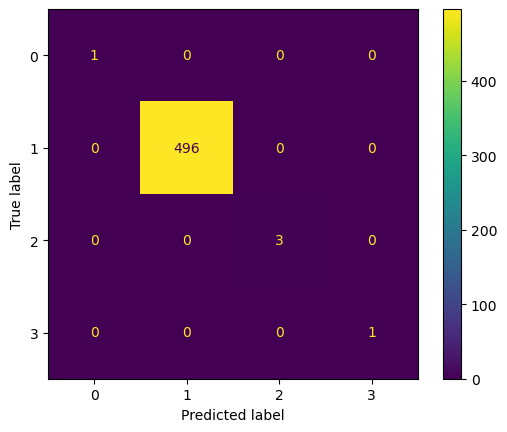

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['0','1','2','3'])
conf_display.plot()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_pred)

print("Acuracy:", Accuracy)

Acuracy: 1.0


In [16]:
from sklearn import metrics

precision_macro = metrics.precision_score(y_test, y_pred, average='macro')
precision_weighted = metrics.precision_score(y_test, y_pred, average='weighted')

print("Precision (macro):", precision_macro)
print("Precision (weighted):", precision_weighted)

Precision (macro): 1.0
Precision (weighted): 1.0


In [17]:
precision_per_class = metrics.precision_score(y_test, y_pred, average=None)
print("Precision per class:", precision_per_class)


Precision per class: [1. 1. 1. 1.]
